In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('salary.csv')

In [3]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

# Data Cleansing

In [6]:
#check missing value
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [7]:
#grouping object columns
kategori = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']
nums = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week']
#check value for each columns

for i in kategori:
    a = df[i].value_counts()
    print(i)
    print(a,'\n')

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 

occupation
 Prof-specialty   

there's are anomaly in workclass, occupation, native-country that value is '?' we will drop it

In [8]:
# replace '?' by NaN
df['workclass'].replace(' ?', np.nan, inplace=True)
df['occupation'].replace(' ?', np.nan, inplace=True)
df['native-country'].replace(' ?', np.nan, inplace=True)
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [9]:
df = df.dropna()
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [10]:
df.shape

(30162, 15)

In [11]:
for i in kategori:
    a = df[i].value_counts()
    print(i)
    print(a,'\n')

workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64 

education
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64 

marital-status
 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64 

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-cl

# Baseline

## Data Preparation

In [12]:
# we will encode target with label encoder first
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States       0  
1             0             0              13   United-States       0  
2             0             0              40   United-States       0  
3             0             0              40   United-States       0  
4             0             0              40            Cuba       0

note : 0 is <= 50k, 1 is >50 k

In [13]:
#data in correlation
cor = df.corr()

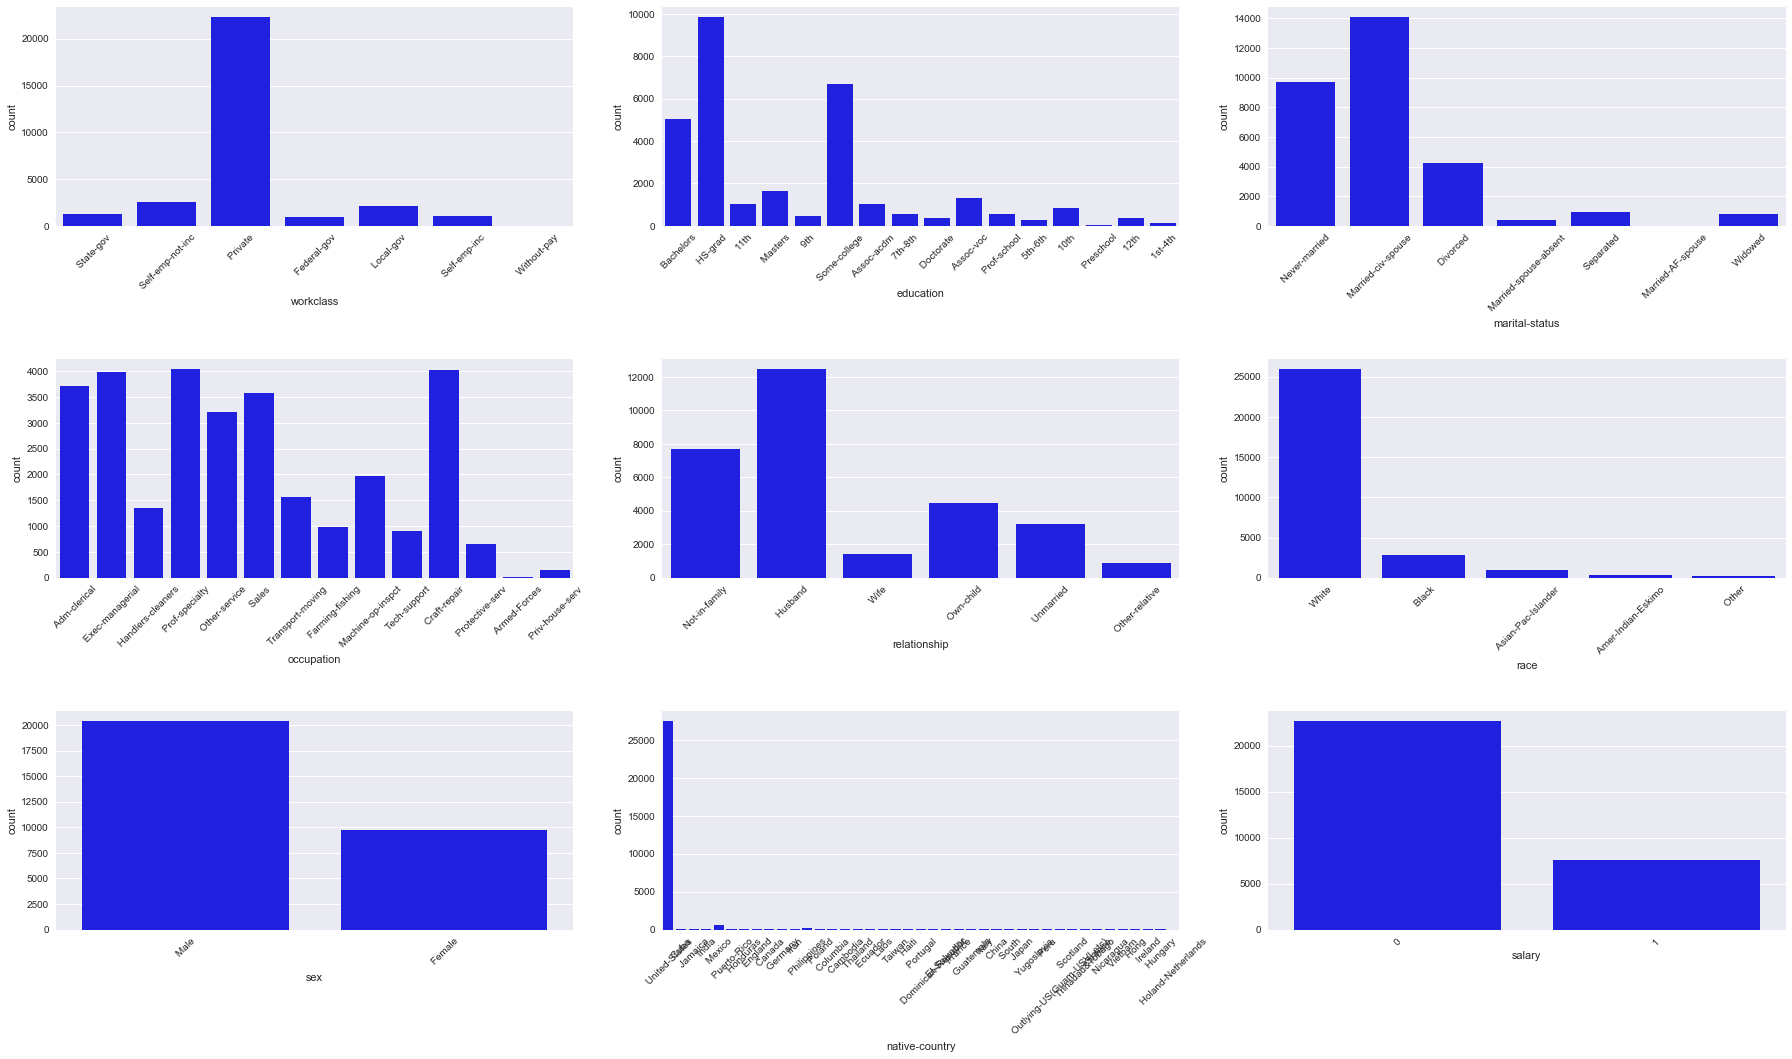

In [172]:
plt.figure(figsize=(25,18))
plt.style.use('seaborn')
#plotting countplot in categoreical columns
features = kategori
#CustomerID tidak dilooping karena valuenya unique, tidak sama satu sama lain
for i in range(1, len(features)+1):
    plt.subplot(4, len(features)//4 + 1, i)
    # plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i-1]], color='blue')
    plt.xticks(rotation=45)
    plt.xlabel(features[i-1])
    plt.tight_layout()

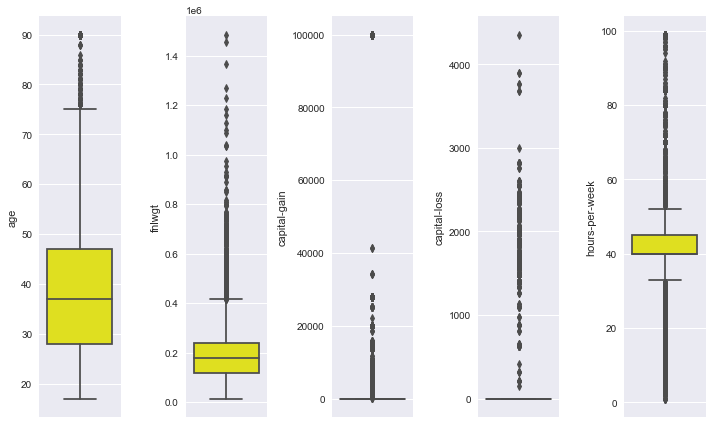

In [173]:
# adjust the figure size for better readability
plt.figure(figsize=(10,6))
plt.style.use('seaborn')

# plotting
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[nums[i]], color='yellow')
    plt.tight_layout()

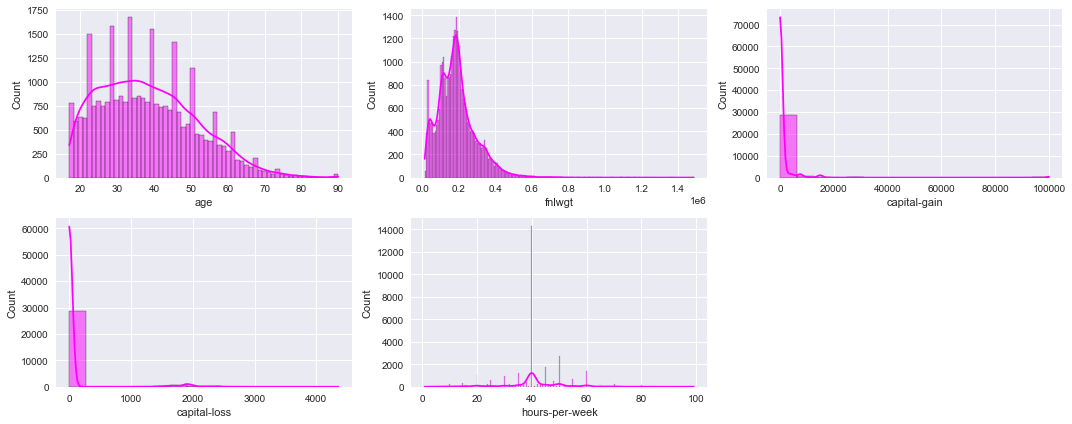

In [174]:
# adjust the figure size for better readability
plt.figure(figsize=(15,6))
plt.style.use('seaborn')

features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
#     plt.subplot(1, len(features), i+1)
    sns.histplot(x=df[features[i]],kde=True, color='magenta')
    plt.xlabel(features[i])
    plt.tight_layout()

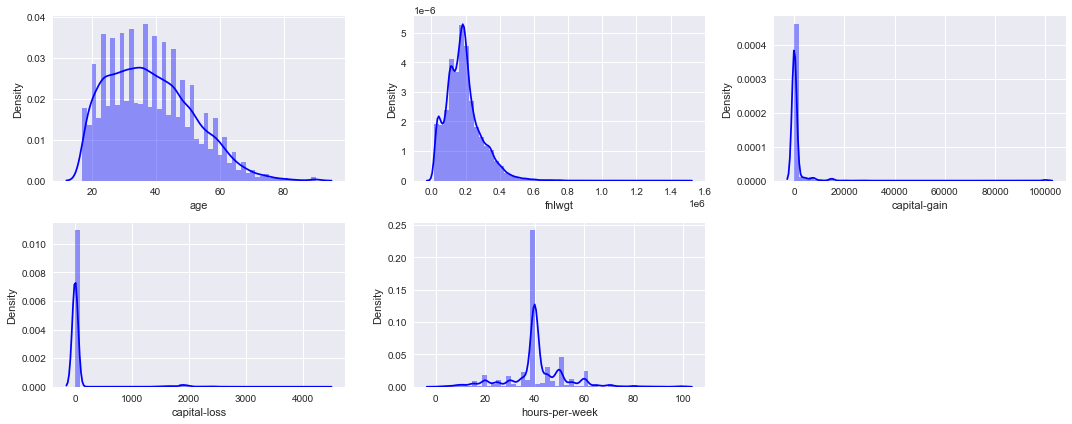

In [175]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn')
# plotting numerical columns
features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
#     plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]],kde=True, color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()
    

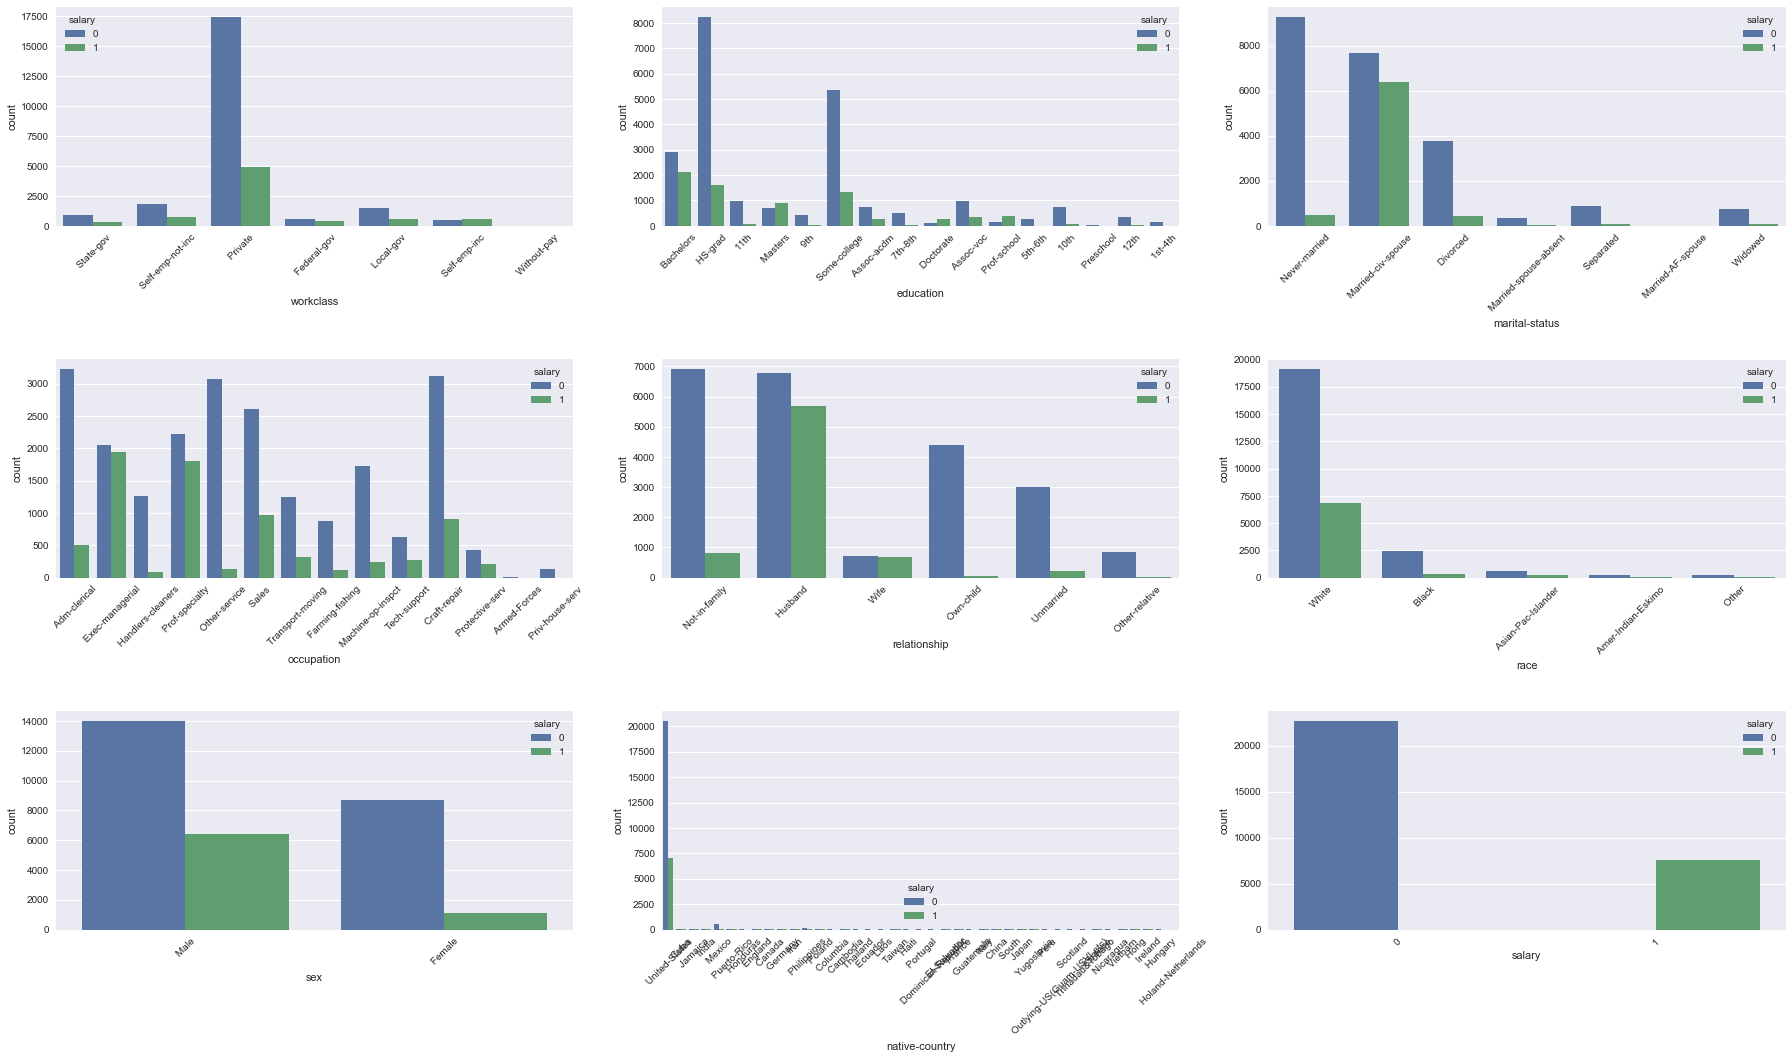

In [176]:
plt.figure(figsize=(25,18))
plt.style.use('seaborn')
#plotting countplot in categoreical columns
features = kategori
#CustomerID tidak dilooping karena valuenya unique, tidak sama satu sama lain
for i in range(1, len(features)+1):
    plt.subplot(4, len(features)//4 + 1, i)
    # plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i-1]],hue=df['salary'])
    plt.xticks(rotation=45)
    plt.xlabel(features[i-1])
    plt.tight_layout()
    
    



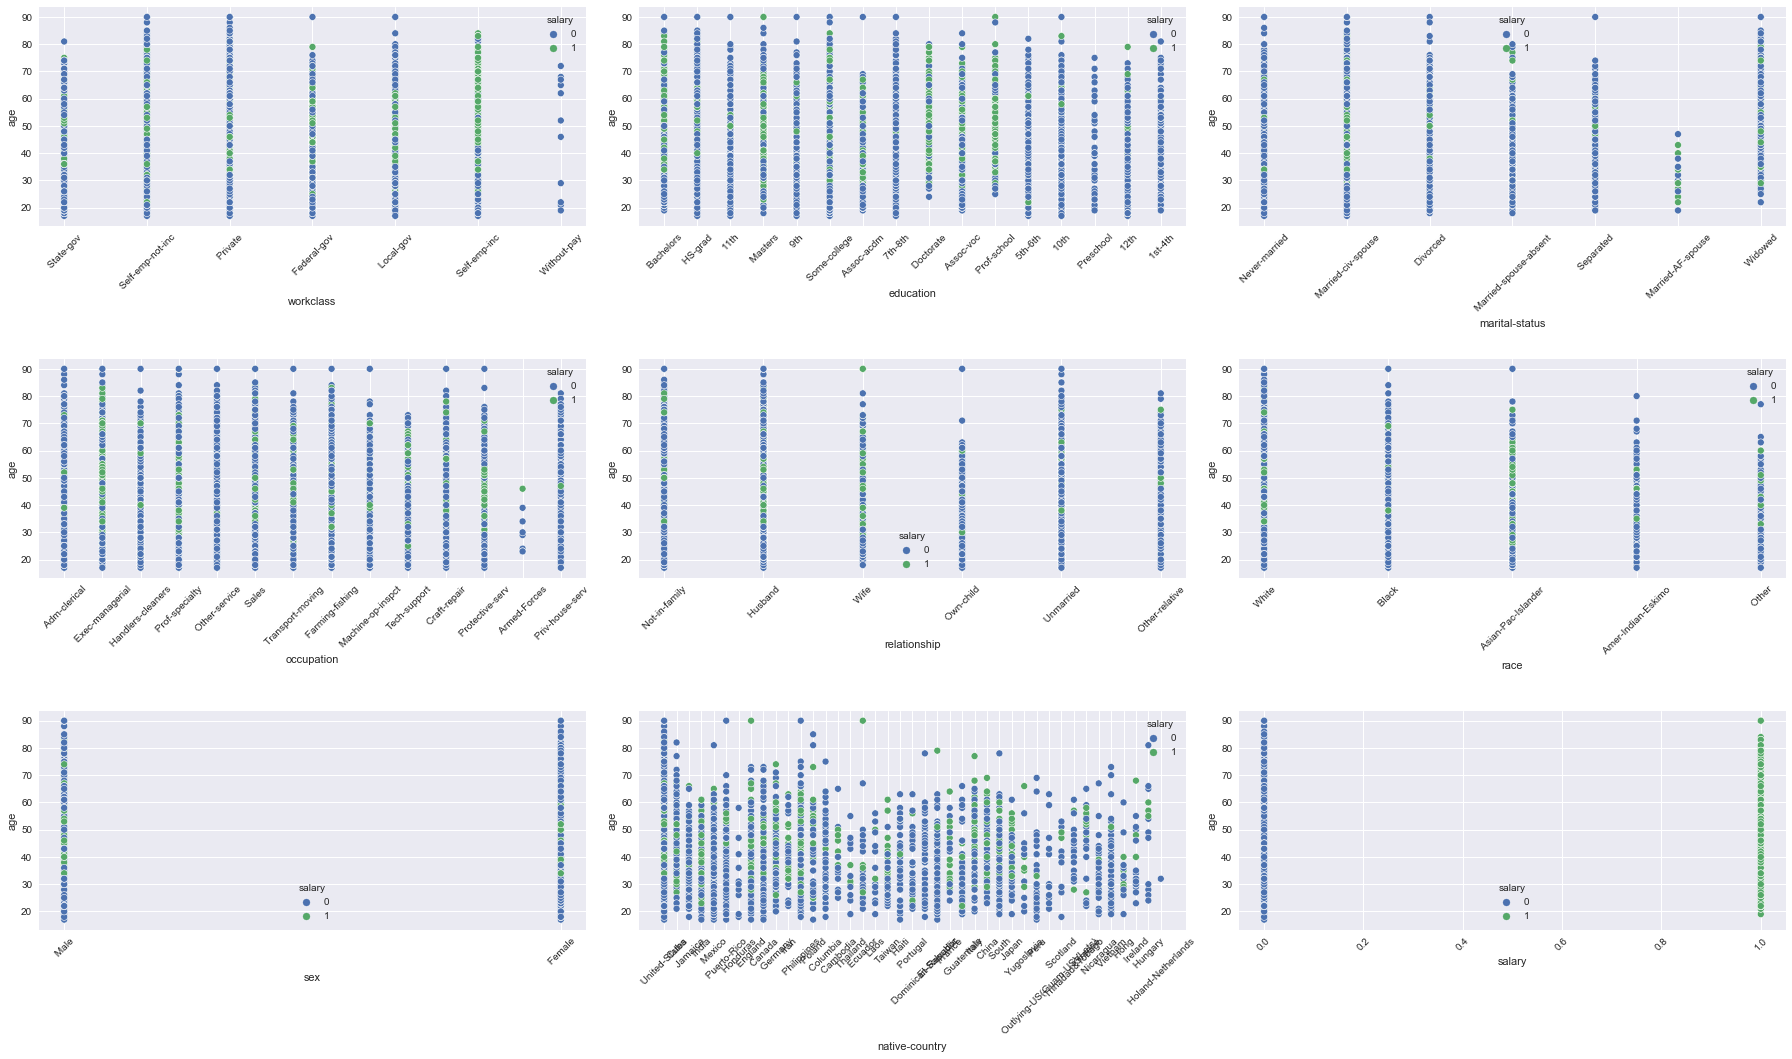

In [177]:
plt.figure(figsize=(25,18))
plt.style.use('seaborn')
#plotting countplot in categoreical columns
features = kategori
#CustomerID tidak dilooping karena valuenya unique, tidak sama satu sama lain
for i in range(1, len(features)+1):
    plt.subplot(4, len(features)//4 + 1, i)
    # plt.subplot(1, len(features), i+1)
    sns.scatterplot(x=df[features[i-1]],y = df['age'],hue=df['salary'])
    plt.xticks(rotation=45)
    plt.xlabel(features[i-1])
    plt.tight_layout()
    


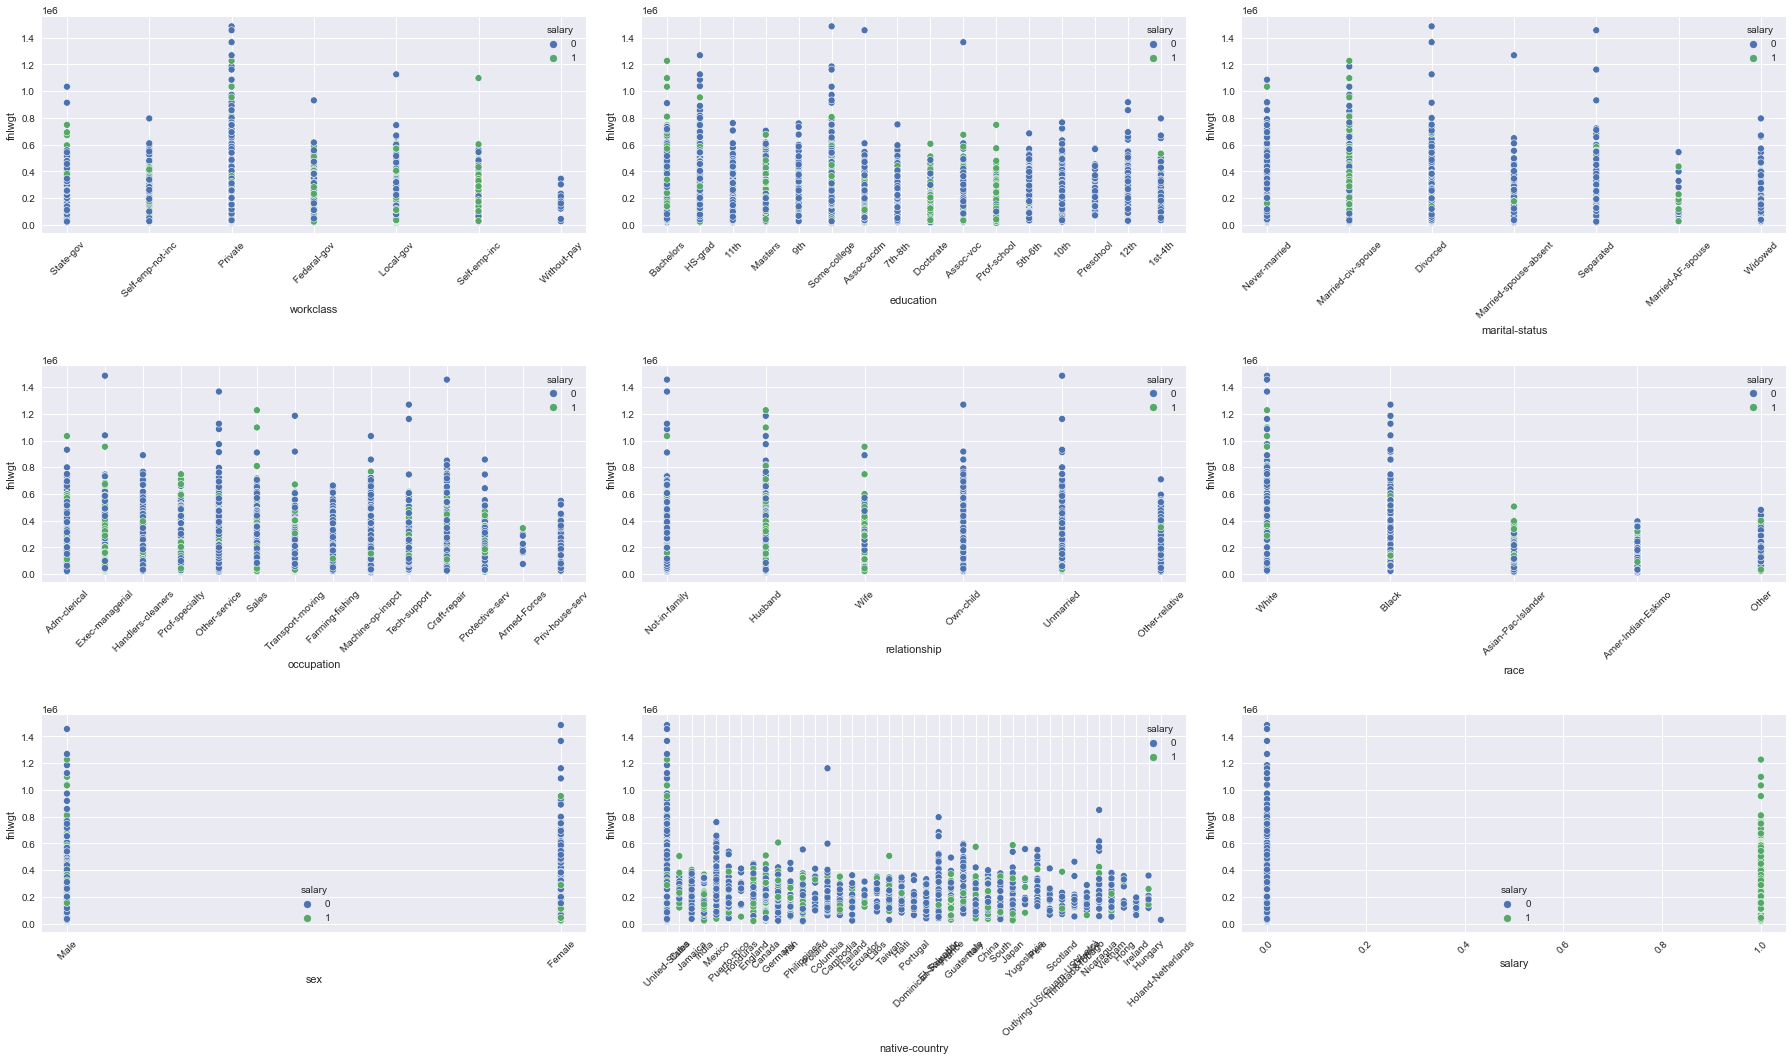

In [180]:
plt.figure(figsize=(25,18))
plt.style.use('seaborn')
#plotting scattertplot in categoreical columns
features = kategori

for i in range(1, len(features)+1):
    plt.subplot(4, len(features)//4 + 1, i)
    # plt.subplot(1, len(features), i+1)
    sns.scatterplot(x=df[features[i-1]],y = df['fnlwgt'],hue=df['salary'])
    plt.xticks(rotation=45)
    plt.xlabel(features[i-1])
    plt.tight_layout()
    

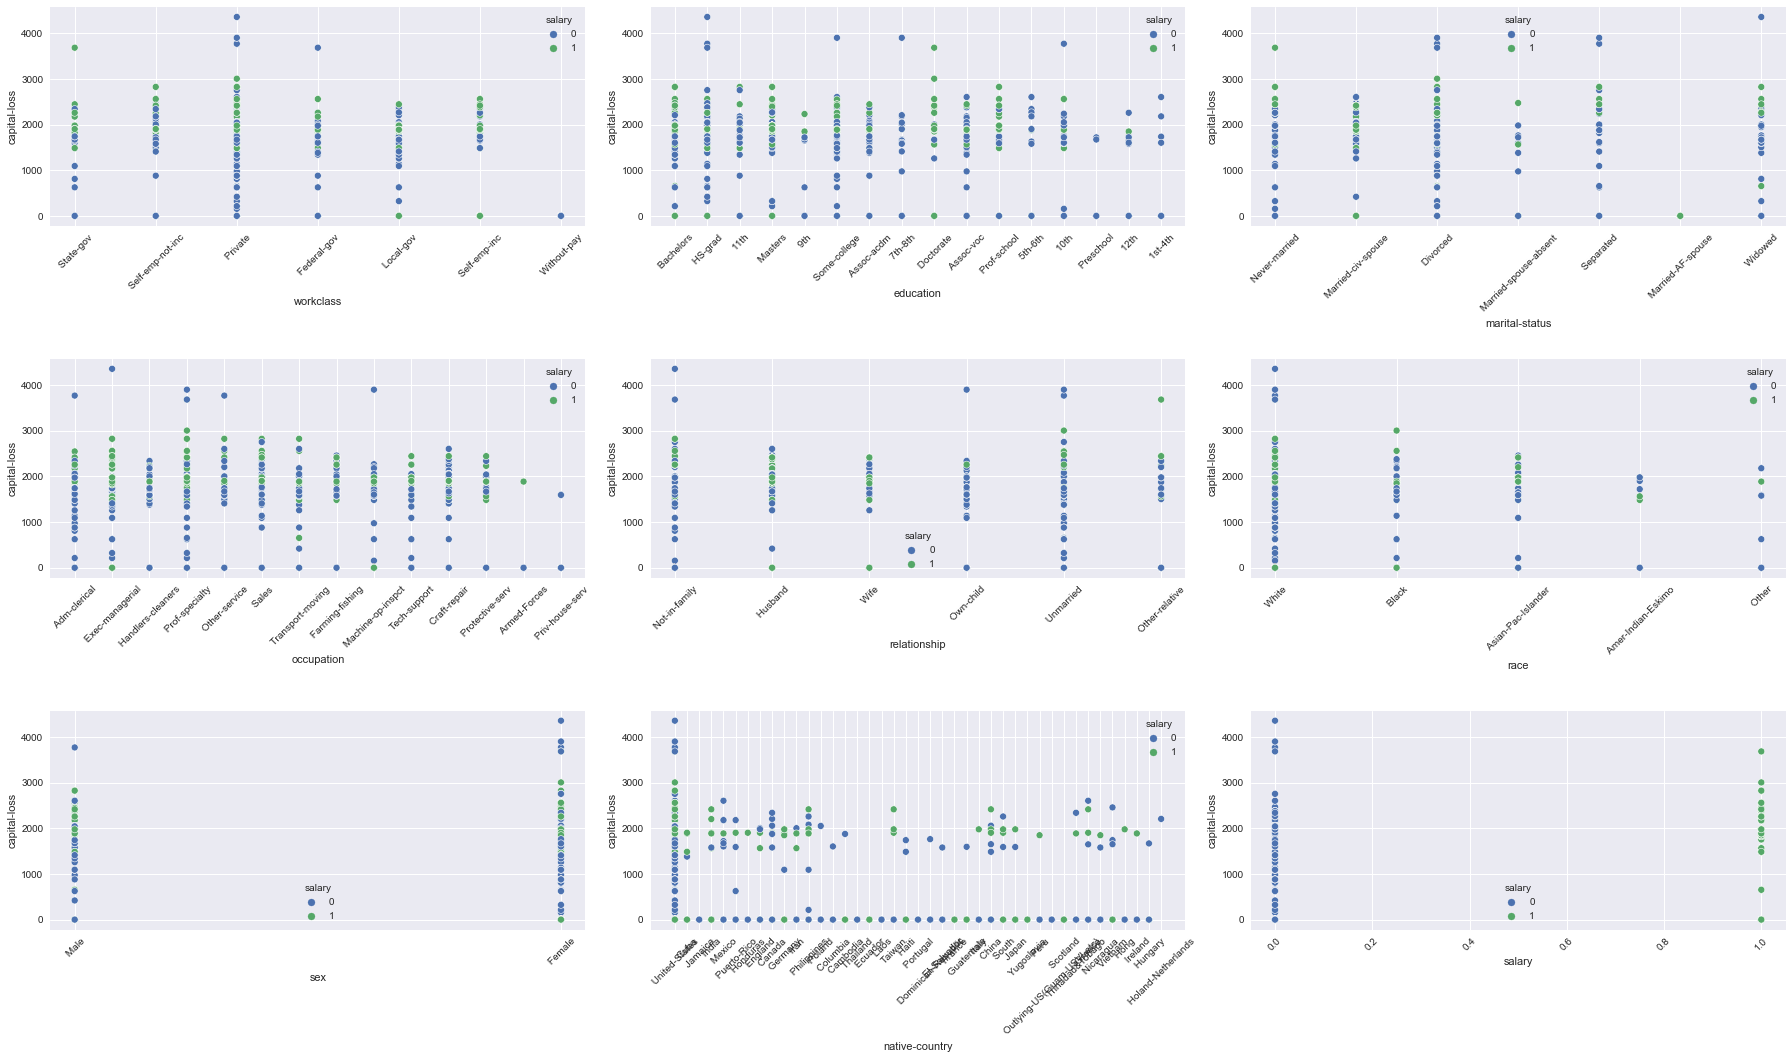

In [178]:
plt.figure(figsize=(25,18))
plt.style.use('seaborn')
#plotting scattertplot in categoreical columns
features = kategori

for i in range(1, len(features)+1):
    plt.subplot(4, len(features)//4 + 1, i)
    # plt.subplot(1, len(features), i+1)
    sns.scatterplot(x=df[features[i-1]],y = df['capital-loss'],hue=df['salary'])
    plt.xticks(rotation=45)
    plt.xlabel(features[i-1])
    plt.tight_layout()
    

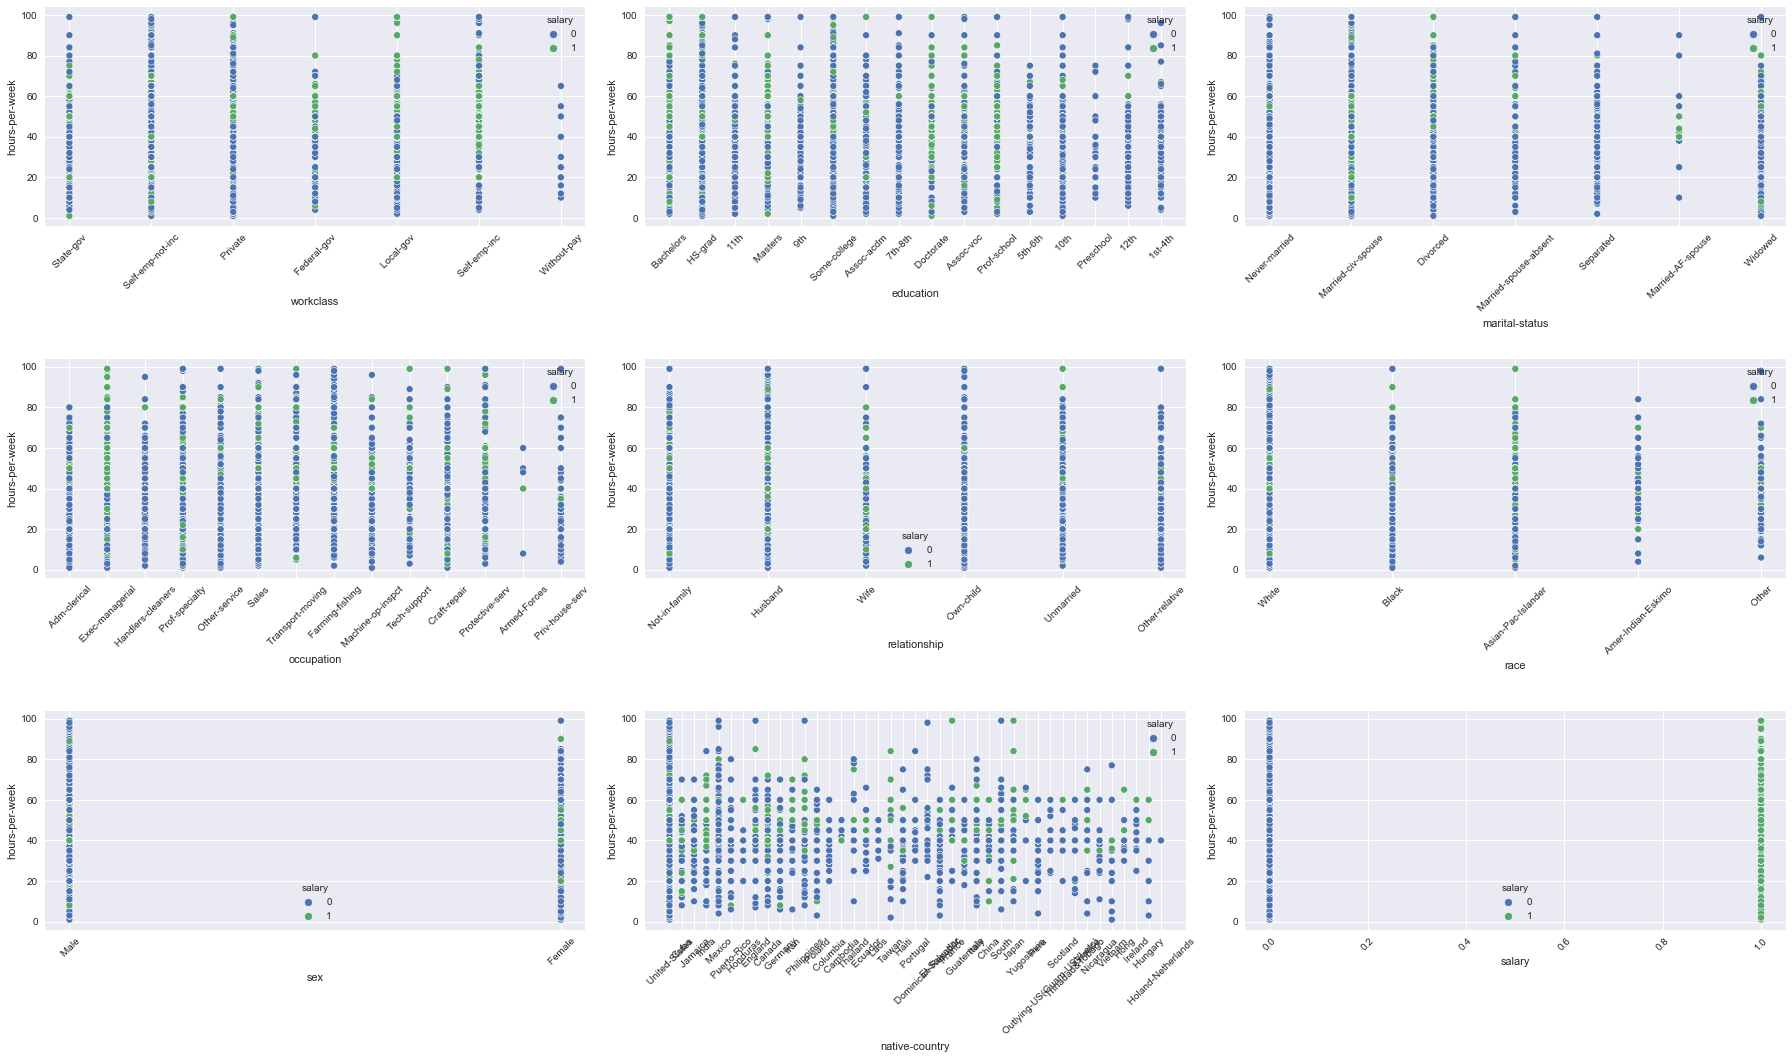

In [171]:
plt.figure(figsize=(25,18))
plt.style.use('seaborn')
#plotting scattertplot in categoreical columns
features = kategori

for i in range(1, len(features)+1):
    plt.subplot(4, len(features)//4 + 1, i)
    # plt.subplot(1, len(features), i+1)
    sns.scatterplot(x=df[features[i-1]],y = df['hours-per-week'],hue=df['salary'])
    plt.xticks(rotation=45)
    plt.xlabel(features[i-1])
    plt.tight_layout()
    

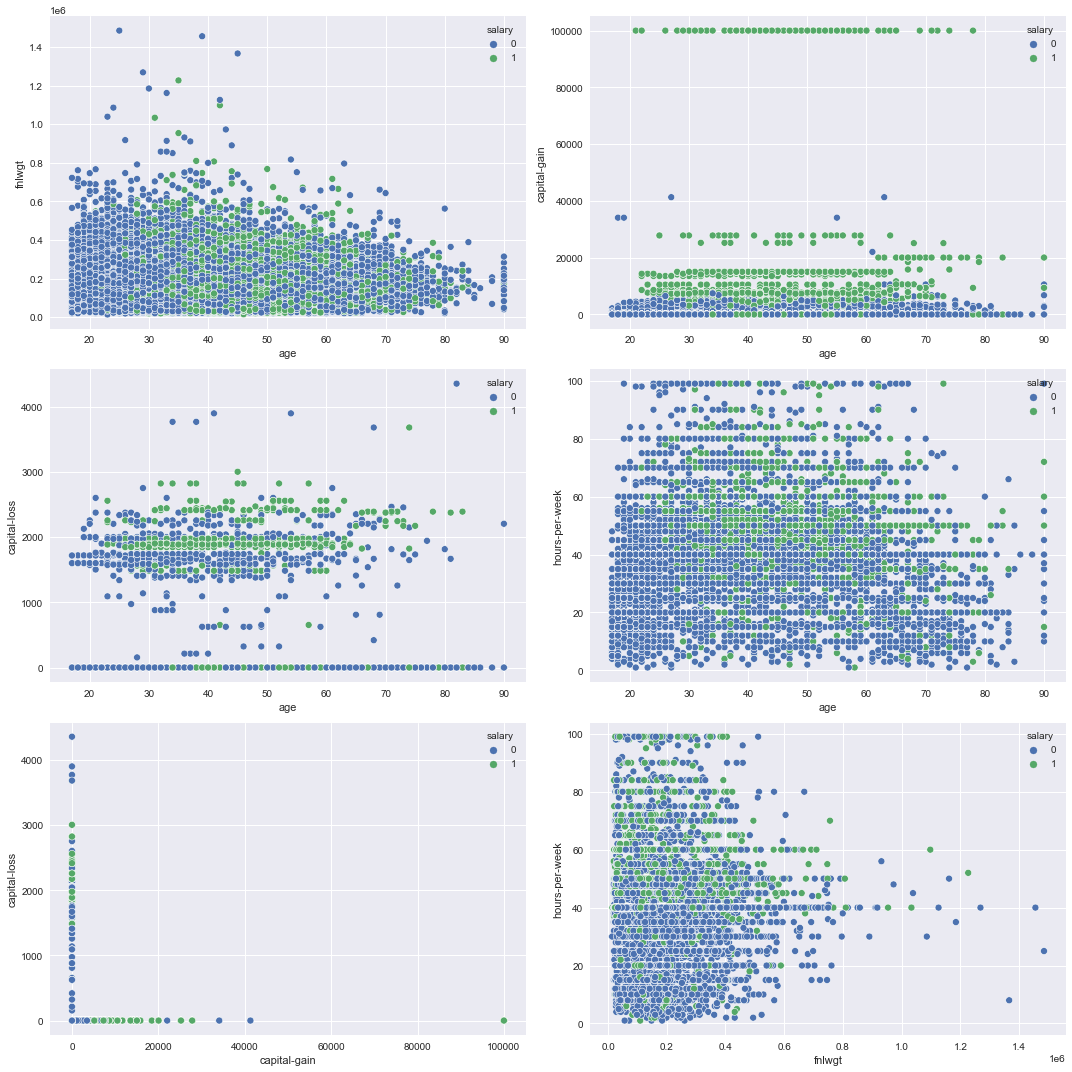

In [179]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
plt.style.use('seaborn')

sns.scatterplot(ax=axes[0,0],x=df.age,y=df.fnlwgt, hue=df.salary)
sns.scatterplot(ax=axes[0,1],x=df.age,y=df['capital-gain'],hue=df.salary)
sns.scatterplot(ax=axes[1,0],x=df.age,y=df['capital-loss'],hue=df.salary)
sns.scatterplot(ax=axes[1,1],x=df.age,y=df['hours-per-week'],hue=df.salary)
sns.scatterplot(ax=axes[2,0],x=df['capital-gain'],y=df['capital-loss'],hue=df.salary)
sns.scatterplot(ax=axes[2,1],x=df.fnlwgt,y=df['hours-per-week'],hue=df.salary)
plt.tight_layout()
plt.show()

In [161]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

<AxesSubplot:>

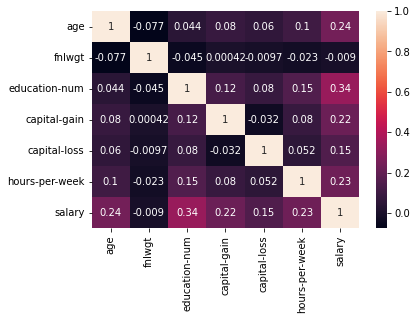

In [18]:
sns.heatmap(cor, annot=True)

nothing high correlation from features to target, we will used all features

## Modelling


In [21]:
#split dataset

X = df[nums]
y = df['salary']

In [22]:
from sklearn.model_selection import train_test_split
#split into train and test
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_logreg, y_train_logreg)
predlog = logreg.predict(X_test_logreg)

In [24]:
#evaluation
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
#confusion matrix
cm_logreg = confusion_matrix(y_test_logreg, predlog)
cm_logreg

array([[5474,  188],
       [1395,  484]], dtype=int64)

In [25]:
#AUC score
print('AUC Score :',roc_auc_score(y_test_logreg, predlog))
#f1 score
print('f1 Score is ',f1_score(y_test_logreg, predlog))
#precision score
print('Precision Score is ',precision_score(y_test_logreg, predlog))
#recall score
print('Recall Score is ',recall_score(y_test_logreg, predlog))

AUC Score : 0.6121900031375431
f1 Score is  0.3794590356722854
Precision Score is  0.7202380952380952
Recall Score is  0.2575838211814795


### KNN Classifier

In [26]:
from sklearn.model_selection import train_test_split
#split into train and test
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                random_state = 42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [28]:
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

In [29]:
knnpred =knn.predict(X_test_knn)

In [30]:
#confusion matrix
cm_knn = confusion_matrix(y_test_knn, knnpred)
cm_knn

array([[5176,  486],
       [1304,  575]], dtype=int64)

In [31]:
#AUC score
print('AUC Score :',roc_auc_score(y_test_knn, knnpred))
#f1 score
print('f1 Score is ',f1_score(y_test_knn, knnpred))
#precision score
print('Precision Score is ',precision_score(y_test_knn, knnpred))
#recall score
print('Recall Score is ',recall_score(y_test_knn, knnpred))

AUC Score : 0.6100892216468284
f1 Score is  0.3911564625850341
Precision Score is  0.5419415645617343
Recall Score is  0.30601383714741887


### Decission Tree

In [32]:
from sklearn.model_selection import train_test_split
#split into train and test
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                random_state = 42)

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier(random_state=42)

In [34]:
dtpred = dt.predict(X_test_dt)

In [35]:
#confusion matrix
cm_dt = confusion_matrix(y_test_dt, dtpred)
pd.DataFrame(cm_dt,columns=["Predicted 1", "Predicted 0"], index=["Actual 1","Actual 0"] )

Predicted 1  Predicted 0
Actual 1         4691          971
Actual 0          915          964

In [36]:
#AUC score
print('AUC Score :',roc_auc_score(y_test_dt, dtpred))
#f1 score
print('f1 Score is ',f1_score(y_test_dt, dtpred))
#precision score
print('Precision Score is ',precision_score(y_test_dt, dtpred))
#recall score
print('Recall Score is ',recall_score(y_test_dt, dtpred))

AUC Score : 0.6707723393907903
f1 Score is  0.5055060304142632
Precision Score is  0.49819121447028425
Recall Score is  0.5130388504523683


### Random Forest Classifier

In [37]:
from sklearn.model_selection import train_test_split
#split into train and test
X_train_randomforest, X_test_randomforest, y_train_randomforest, y_test_randomforest = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
randomforest = RandomForestClassifier()


In [40]:
#fit into data
randomforest.fit(X_train_randomforest, y_train_randomforest)

RandomForestClassifier()

In [41]:
randomforest_predict = dt.predict(X_test_randomforest)

In [42]:
#confusion matrix
cm_ranfor = confusion_matrix(y_test_randomforest, randomforest_predict)
cm_ranfor

array([[4691,  971],
       [ 915,  964]], dtype=int64)

In [43]:
#AUC score
print('AUC Score :',roc_auc_score(y_test_randomforest, randomforest_predict))

#f1 score
print('f1 Score is ',f1_score(y_test_randomforest, randomforest_predict))

#precision score
print('Precision Score is ',precision_score(y_test_randomforest, randomforest_predict))

#recall score
print('Recall Score is ',recall_score(y_test_randomforest, randomforest_predict))

AUC Score : 0.6707723393907903
f1 Score is  0.5055060304142632
Precision Score is  0.49819121447028425
Recall Score is  0.5130388504523683


### XGBoost Classifier

In [44]:
from sklearn.model_selection import train_test_split
#split into train and test
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                random_state = 42)

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb = XGBClassifier()

In [47]:
xgb.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
xgb_predict = xgb.predict(X_test_xgb)

In [49]:
 #confusion matrix
cm_xgb = confusion_matrix(y_test_xgb, xgb_predict)
cm_xgb

array([[5521,  141],
       [1159,  720]], dtype=int64)

In [50]:
#AUC score
print('AUC Score :',roc_auc_score(y_test_xgb, xgb_predict))
#f1 score
print('f1 Score is ',f1_score(y_test_xgb, xgb_predict))
#precision score
print('Precision Score is ',precision_score(y_test_xgb, xgb_predict))
#recall score
print('Recall Score is ',recall_score(y_test_xgb, xgb_predict))

AUC Score : 0.679139841363269
f1 Score is  0.5255474452554744
Precision Score is  0.8362369337979094
Recall Score is  0.38318254390633316


# Improvements

## Data Preparation

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salary          30162 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 4.6+ MB


In [52]:
df1 = df.copy()

In [53]:
df1.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States       0  
1             0             0              13   United-States       0  
2             0             0              40   United-States       0  
3             0             0              40   United-States       0  
4             0             0              40            Cuba       0

In [54]:
df1.nunique()

age                  72
workclass             7
fnlwgt            20263
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        118
capital-loss         90
hours-per-week       94
native-country       41
salary                2
dtype: int64

In [55]:
#drop edcuation, because we has education-num for features
df1 = df1.drop('education', axis=1)

In [56]:
#label encoding for sex 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['sex'] = le.fit_transform(df1['sex'])
df1['native-country'] = le.fit_transform(df1['native-country'])
df1['occupation'] = le.fit_transform(df1['occupation'])

# onehotencoding for workclass, marital-status, relationship, race
df1['workclass'] = df['workclass'].astype('category')
df1['marital-status'] = df['marital-status'].astype('category')
df1['relationship'] = df['relationship'].astype('category')
df1['race'] = df['race'].astype('category')
df1 = pd.get_dummies(df1, columns=['workclass', 'marital-status', 'relationship', 'race'])


In [57]:
df1.head(2)

age  fnlwgt  education-num  occupation  sex  capital-gain  capital-loss  \
0   39   77516             13           0    1          2174             0   
1   50   83311             13           3    1             0             0   

   hours-per-week  native-country  salary  ...  relationship_ Not-in-family  \
0              40              38       0  ...                            1   
1              13              38       0  ...                            0   

   relationship_ Other-relative  relationship_ Own-child  \
0                             0                        0   
1                             0                        0   

   relationship_ Unmarried  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                        0                   0                         0   
1                        0                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  
0                         0            0            0            1  
1                         0            0            0            1  

[2 rows x 35 columns]

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   age                                    30162 non-null  int64
 1   fnlwgt                                 30162 non-null  int64
 2   education-num                          30162 non-null  int64
 3   occupation                             30162 non-null  int32
 4   sex                                    30162 non-null  int32
 5   capital-gain                           30162 non-null  int64
 6   capital-loss                           30162 non-null  int64
 7   hours-per-week                         30162 non-null  int64
 8   native-country                         30162 non-null  int32
 9   salary                                 30162 non-null  int32
 10  workclass_ Federal-gov                 30162 non-null  uint8
 11  workclass_ Local-gov        

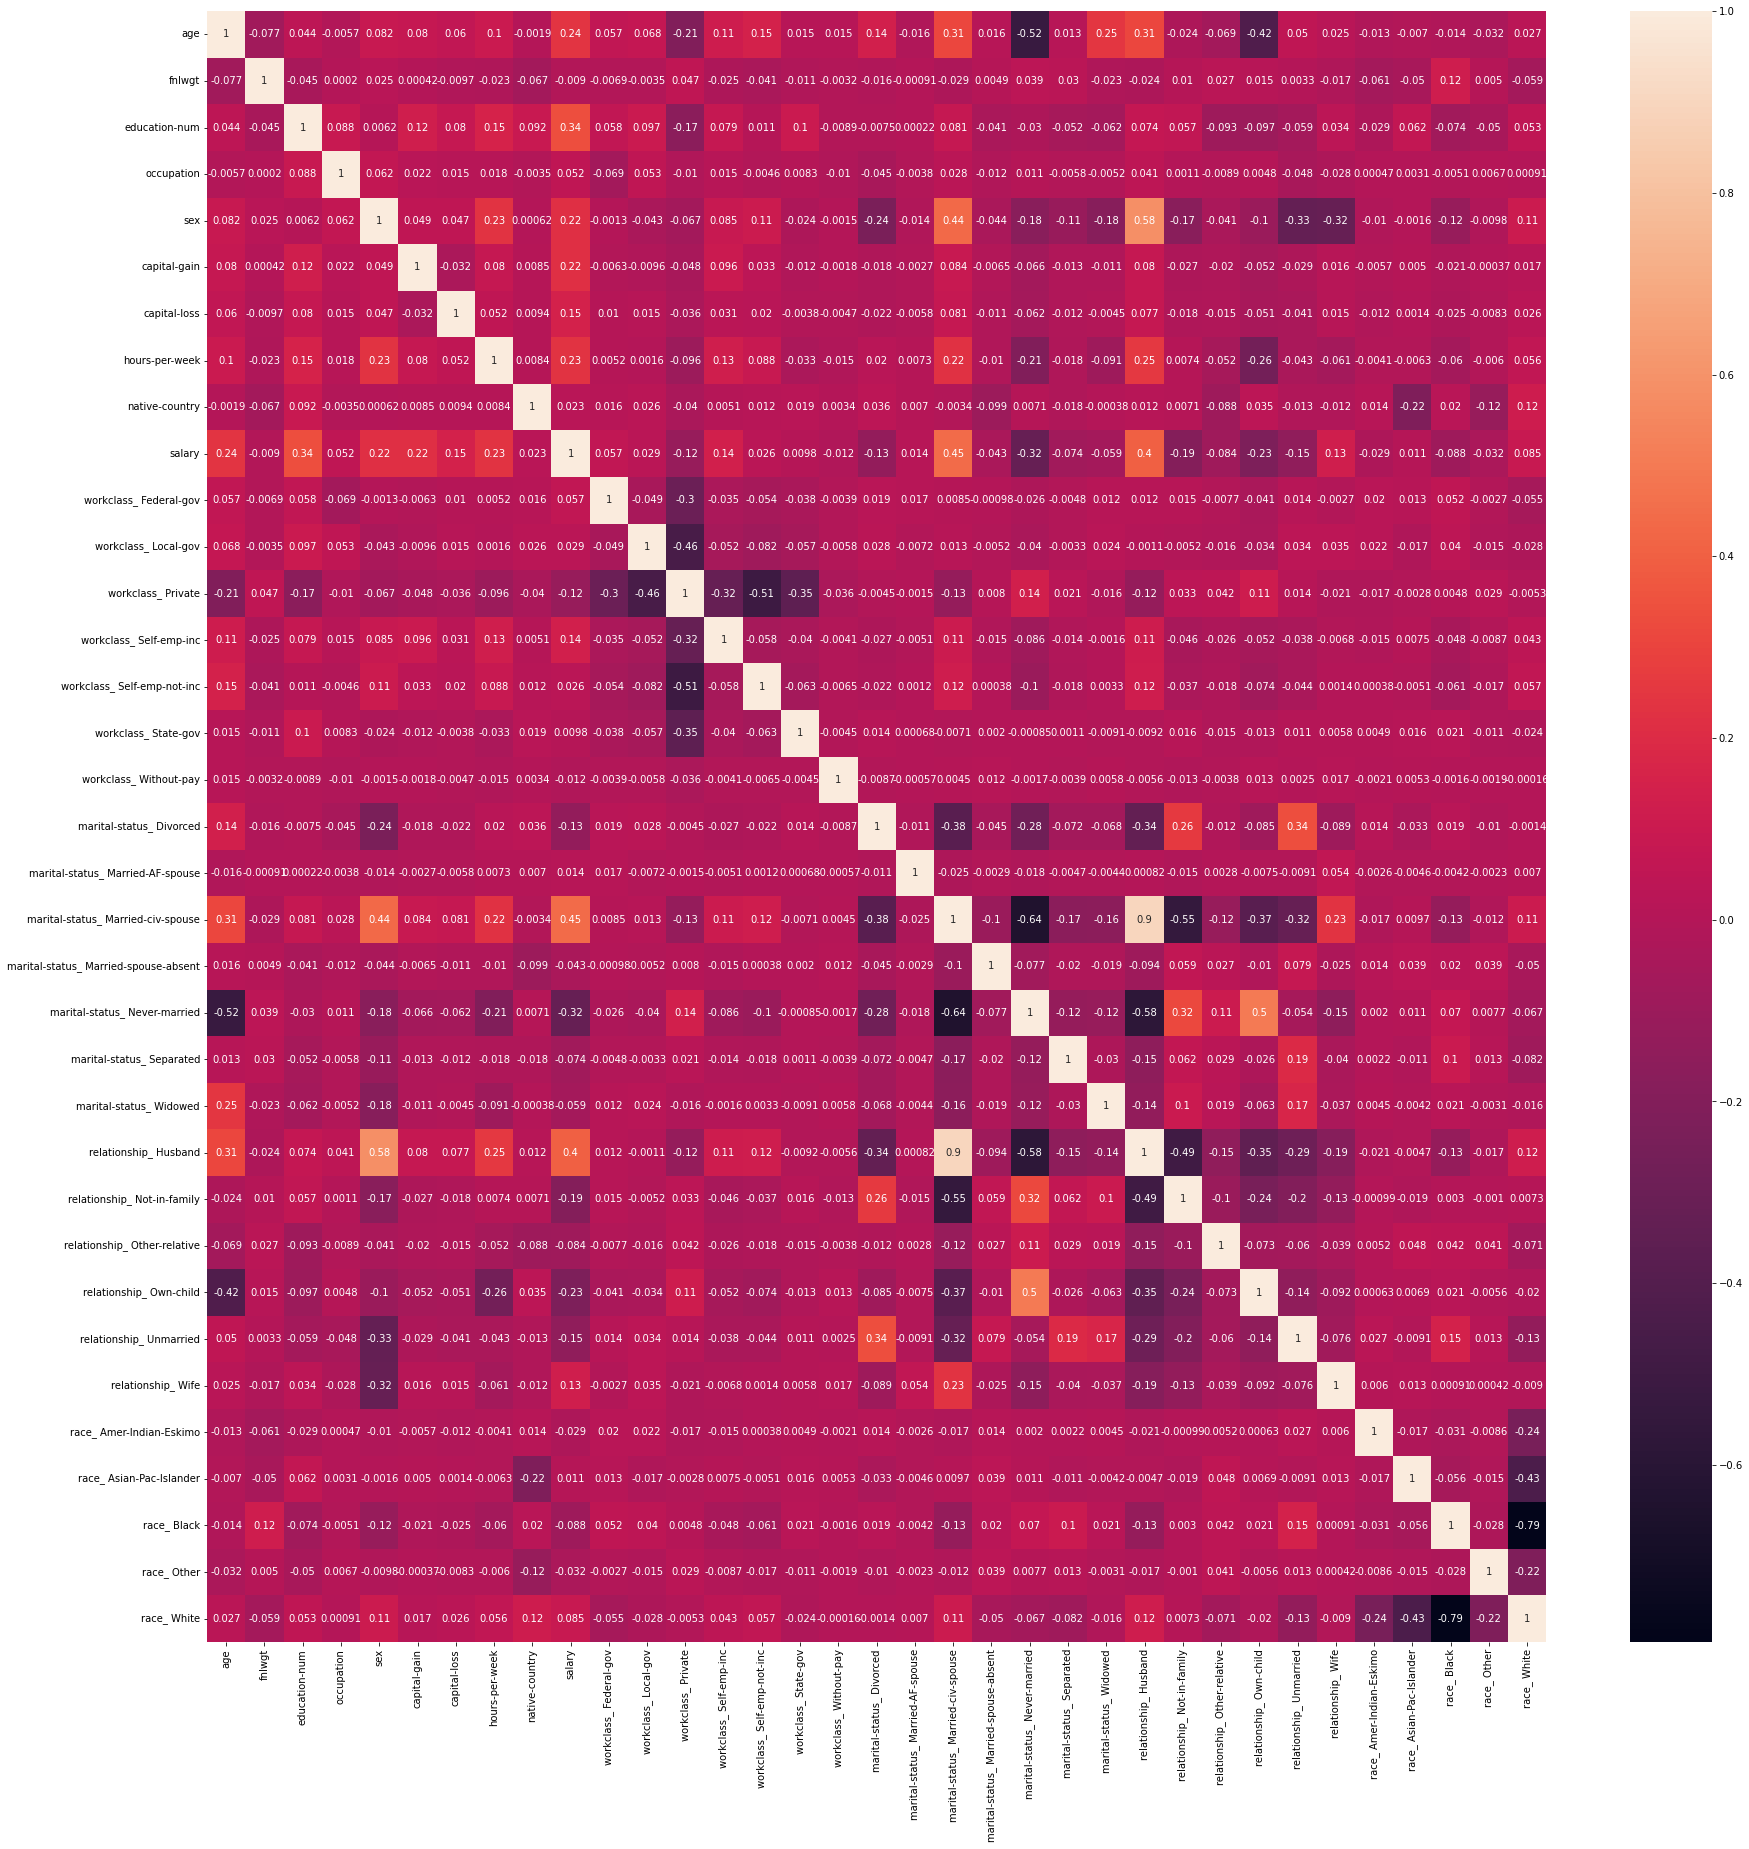

In [59]:

# Correlation Heatmap

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df1.corr(), annot = True, ax=ax)
plt.savefig('correlation_heatmap.png')


as we can see relationship-status_husband high correlated with marital-status_married-civ-spouse, we will drop one.

In [60]:
df1 = df1.drop('marital-status_ Married-civ-spouse', axis=1)

## Modelling

In [61]:
#split dataset

X = df1.drop('salary',axis=1)
y = df1['salary']

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X = pd.DataFrame(data = X_std, columns = list(X))
X.head()

age    fnlwgt  education-num  occupation       sex  capital-gain  \
0  0.042796 -1.062722       1.128918   -1.479055  0.692806      0.146092   
1  0.880288 -1.007871       1.128918   -0.734545  0.692806     -0.147445   
2 -0.033340  0.244693      -0.439738   -0.238206  0.692806     -0.147445   
3  1.108695  0.425240      -1.224066   -0.238206  0.692806     -0.147445   
4 -0.794697  1.406658       1.128918    0.754473 -1.443405     -0.147445   

   capital-loss  hours-per-week  native-country  workclass_ Federal-gov  ...  \
0     -0.218586       -0.077734        0.264924               -0.179648  ...   
1     -0.218586       -2.331531        0.264924               -0.179648  ...   
2     -0.218586       -0.077734        0.264924               -0.179648  ...   
3     -0.218586       -0.077734        0.264924               -0.179648  ...   
4     -0.218586       -0.077734       -5.304034               -0.179648  ...   

   relationship_ Not-in-family  relationship_ Other-relative  \
0                     1.704101                     -0.174268   
1                    -0.586820                     -0.174268   
2                     1.704101                     -0.174268   
3                    -0.586820                     -0.174268   
4                    -0.586820                     -0.174268   

   relationship_ Own-child  relationship_ Unmarried  relationship_ Wife  \
0                -0.416895                 -0.34523           -0.221120   
1                -0.416895                 -0.34523           -0.221120   
2                -0.416895                 -0.34523           -0.221120   
3                -0.416895                 -0.34523           -0.221120   
4                -0.416895                 -0.34523            4.522427   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                 -0.097841                 -0.174873    -0.320963   
1                 -0.097841                 -0.174873    -0.320963   
2                 -0.097841                 -0.174873    -0.320963   
3                 -0.097841                 -0.174873     3.115628   
4                 -0.097841                 -0.174873     3.115628   

   race_ Other  race_ White  
0    -0.087851     0.403824  
1    -0.087851     0.403824  
2    -0.087851     0.403824  
3    -0.087851    -2.476324  
4    -0.087851    -2.476324  

[5 rows x 33 columns]

### Logistic Regression

In [63]:
from sklearn.model_selection import train_test_split
#split into train and test

X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                random_state = 42)

### Finding Optimal Parameter for : precision
Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      5662
           1       0.57      0.84      0.68      1879

    accuracy                           0.80      7541
   macro avg       0.76      0.82      0.77      7541
weighted avg       0.85      0.80      0.82      7541



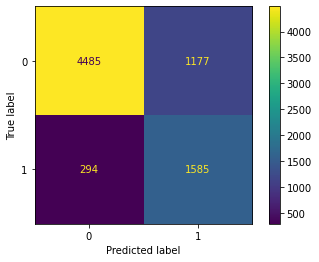

AUC Score : 0.8178283596665744
f1 Score is  0.68304244774833
Precision Score is  0.5738595220854453
Recall Score is  0.8435337945715806
### Finding Optimal Parameter for : recall
Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      5662
           1       0.49      0.88      0.63      1879

    accuracy                           0.74      7541
   macro avg       0.72      0.79      0.71      7541
weighted avg       0.83      0.74      0.76      7541



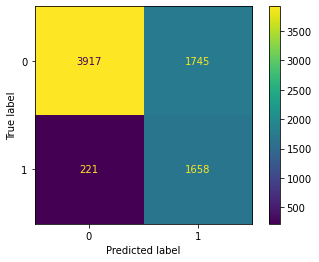

AUC Score : 0.7870946314176525
f1 Score is  0.6277925028398333
Precision Score is  0.4872171613282398
Recall Score is  0.8823842469398616


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

metrics = ['precision','recall']
logreg = LogisticRegression(class_weight='balanced') #balancing the data because the data is imbalanced
for metric in metrics:
    print('### Finding Optimal Parameter for :',metric)
    clf = GridSearchCV(logreg,                    # model
                       param_grid = parameters,   # hyperparameters
                       scoring=metric,        # metric for scoring
                       cv=5)
    clf.fit(X_train_logreg,y_train_logreg)
    print("Tuned Hyperparameters :", clf.best_params_)
    logreg_pred = clf.predict(X_test_logreg)
    print(classification_report(y_test_logreg, logreg_pred ))
    #confusion matrix
    cm_logreg = confusion_matrix(y_test_logreg, logreg_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg,
                                   display_labels=clf.classes_)
    disp.plot()
    plt.show()
    #AUC score
    print('AUC Score :',roc_auc_score(y_test_logreg, logreg_pred))

    #f1 score
    print('f1 Score is ',f1_score(y_test_logreg, logreg_pred))

    #precision score
    print('Precision Score is ',precision_score(y_test_logreg, logreg_pred))

    #recall score
    print('Recall Score is ',recall_score(y_test_logreg, logreg_pred))

### Decission Tree

In [ ]:
from sklearn.model_selection import train_test_split
#split into train and test

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                random_state = 42)

### Finding Optimal Parameter for : precision
Fitting 10 folds for each of 686 candidates, totalling 6860 fits
Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}
Tuned Hyperparameters : 0.5294245090080041
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      5662
           1       0.54      0.59      0.57      1879

    accuracy                           0.77      7541
   macro avg       0.70      0.71      0.71      7541
weighted avg       0.78      0.77      0.78      7541



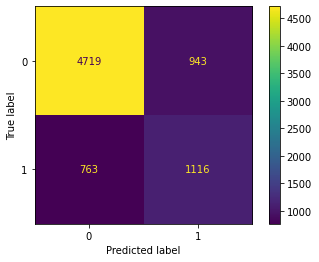

AUC Score : 0.7136920102063202
f1 Score is  0.5667851701371255
Precision Score is  0.5420106847984458
Recall Score is  0.5939329430548164
### Finding Optimal Parameter for : recall
Fitting 10 folds for each of 686 candidates, totalling 6860 fits
Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Hyperparameters : 0.960206822879465
              precision    recall  f1-score   support

           0       0.96      0.32      0.48      5662
           1       0.32      0.96      0.48      1879

    accuracy                           0.48      7541
   macro avg       0.64      0.64      0.48      7541
weighted avg       0.80      0.48      0.48      7541



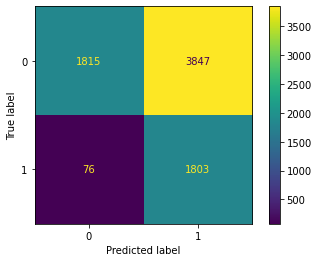

AUC Score : 0.6400555301874311
f1 Score is  0.47894806747243995
Precision Score is  0.31911504424778764
Recall Score is  0.9595529536987759


In [86]:
from sklearn.tree import DecisionTreeClassifier

# Create grid parameters for hyperparameter tuning
parameters =  {
    'min_samples_leaf': range(1,8),
    'min_samples_split': range(1,8),
    'max_depth': range(1,8),
    'criterion' : ['gini', 'entropy']
}

# create dt classifier
dt = DecisionTreeClassifier(class_weight='balanced')
# Create gridsearch instance
metrics = ['precision','recall']

for metric in metrics:
    print('### Finding Optimal Parameter for :',metric)
    clf = GridSearchCV(estimator=dt,
                        param_grid=parameters,
                        cv=10,
                        n_jobs=-1,
                        verbose=2,
                        scoring=metric)
    clf.fit(X_train_dt,y_train_dt)
    print("Tuned Hyperparameters :", clf.best_params_)
    print("Tuned Hyperparameters :", clf.best_score_)
    dt_pred = clf.predict(X_test_dt)
    print(classification_report(y_test_dt, dt_pred ))
    #confusion matrix
    cm_dt = confusion_matrix(y_test_dt, dt_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                                   display_labels=clf.classes_)
    disp.plot()
    plt.show()
    
    #AUC score
    print('AUC Score :',roc_auc_score(y_test_dt, dt_pred))

    #f1 score
    print('f1 Score is ',f1_score(y_test_dt, dt_pred))

    #precision score
    print('Precision Score is ',precision_score(y_test_dt, dt_pred))

    #recall score
    print('Recall Score is ',recall_score(y_test_dt, dt_pred))

### Random Forest Classifier

In [96]:
from sklearn.model_selection import train_test_split
#split into train and test

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                random_state = 42)

In [112]:
# Create grid parameters for hyperparameter tuning
parameters =  {

    'bootstrap': [True],

    'max_depth': [80, 90, 100, 110],

    'max_features': [2, 3],

    'min_samples_leaf': [3, 4, 5],

    'min_samples_split': [8, 10, 12],

    'n_estimators': [100, 200, 300, 1000]
}

### Finding Optimal Parameter for : precision
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Tuned Hyperparameters : 0.5996309318372076
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      5662
           1       0.60      0.84      0.70      1879

    accuracy                           0.82      7541
   macro avg       0.77      0.83      0.79      7541
weighted avg       0.86      0.82      0.83      7541



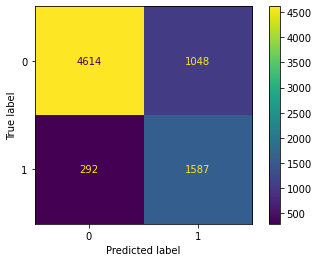

AUC Score : 0.8297522920137029
f1 Score is  0.7031457687195392
Precision Score is  0.6022770398481974
Recall Score is  0.844598190526876
### Finding Optimal Parameter for : recall
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 110, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Hyperparameters : 0.8704931276337696
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      5662
           1       0.56      0.86      0.68      1879

    accuracy                           0.80      7541
   macro avg       0.75      0.82      0.76      7541
weighted avg       0.85      0.80      0.81      7541



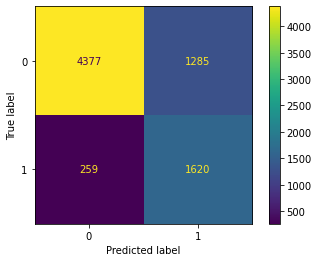

AUC Score : 0.8176045582916577
f1 Score is  0.6772575250836119
Precision Score is  0.5576592082616179
Recall Score is  0.8621607237892496


In [113]:
from sklearn.ensemble import RandomForestClassifier

# create dt classifier
rf = RandomForestClassifier(class_weight='balanced')
# Create gridsearch instance
metrics = ['precision','recall']

for metric in metrics:
    print('### Finding Optimal Parameter for :',metric)
    clf = GridSearchCV(estimator=rf,
                        param_grid=parameters,
                        cv=3,
                        n_jobs=1,
                        verbose=1,
                        scoring=metric)
    clf.fit(X_train_rf,y_train_rf)
    print("Tuned Hyperparameters :", clf.best_params_)
    print("Tuned Hyperparameters :", clf.best_score_)
    rf_pred = clf.predict(X_test_rf)
    print(classification_report(y_test_rf, rf_pred ))
    #confusion matrix
    cm_rf = confusion_matrix(y_test_rf, rf_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                                   display_labels=clf.classes_)
    disp.plot()
    plt.show()
    
    #AUC score
    print('AUC Score :',roc_auc_score(y_test_rf, rf_pred))

    #f1 score
    print('f1 Score is ',f1_score(y_test_rf, rf_pred))

    #precision score
    print('Precision Score is ',precision_score(y_test_rf, rf_pred))

    #recall score
    print('Recall Score is ',recall_score(y_test_rf, rf_pred))



### XGB Classifier

In [204]:
from sklearn.model_selection import train_test_split
#split into train and test

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                random_state = 42)

In [205]:

parameters = { 
    "colsample_bytree": [ 0.1, 0.3, 0.5 , 0.8, 1.0 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5],
    'n_estimators': [100],
    
    }

### Finding Optimal Parameter for : precision
[19:32:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tuned Hyperparameters : {'colsample_bytree': 0.1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 5}
Tuned Hyperparameters : 0.7856451109206415
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5662
           1       0.80      0.65      0.72      1879

    accuracy                           0.87      7541
   macro avg       0.85      0.80      0.82      7541
weighted avg       0.87      0.87      0.87      7541



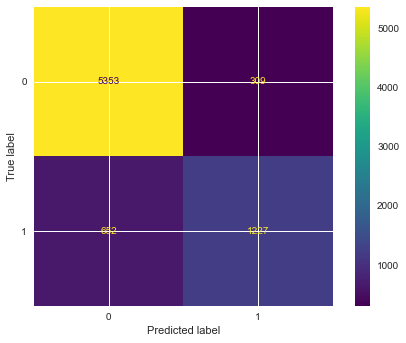

AUC Score : 0.7992162816111218
f1 Score is  0.7185944363103952
Precision Score is  0.798828125
Recall Score is  0.6530069185737094
### Finding Optimal Parameter for : recall
[19:42:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tuned Hyperparameters : {'colsample_bytree': 0.5, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1}
Tuned Hyperparameters : 0.6683263469508585
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5662
           1       0.79      0.67      0.72      1879

    accuracy                           0.87      7541
   macro avg       0.84      0.80     

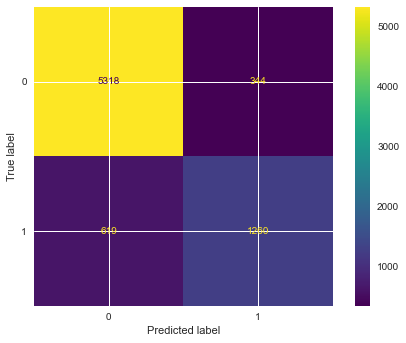

AUC Score : 0.8049067675994263
f1 Score is  0.7235142118863049
Precision Score is  0.7855361596009975
Recall Score is  0.6705694518360831


In [207]:
from xgboost import XGBClassifier
# create xgb classifier
xgb = XGBClassifier(class_weight='balanced')
# Create gridsearch instance
metrics = ['precision','recall']

for metric in metrics:
    print('### Finding Optimal Parameter for :',metric)
    clf = GridSearchCV(estimator=xgb,
                        param_grid=parameters,
                        cv=5,
                        n_jobs=-1,
                        verbose=0,
                        scoring=metric)
    clf.fit(X_train_xgb,y_train_xgb)
    print("Tuned Hyperparameters :", clf.best_params_)
    print("Tuned Hyperparameters :", clf.best_score_)
    xgb_pred = clf.predict(X_test_xgb)
    print(classification_report(y_test_xgb, xgb_pred ))
    #confusion matrix
    cm_xgb = confusion_matrix(y_test_xgb, xgb_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
                                   display_labels=clf.classes_)
    disp.plot()
    plt.show()
    
    #AUC score
    print('AUC Score :',roc_auc_score(y_test_xgb, xgb_pred))

    #f1 score
    print('f1 Score is ',f1_score(y_test_xgb, xgb_pred))

    #precision score
    print('Precision Score is ',precision_score(y_test_xgb, xgb_pred))

    #recall score
    print('Recall Score is ',recall_score(y_test_xgb, xgb_pred))



### Try Data With Random Forest

In [65]:
from sklearn.model_selection import train_test_split
#split into train and test
X_train_randomforest, X_test_randomforest, y_train_randomforest, y_test_randomforest = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                random_state = 42)

In [66]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train_randomforest, y_train_randomforest)

RandomForestClassifier()

In [67]:
rf_predict = randomforest.predict(X_test_randomforest)

In [68]:
cm_rf = confusion_matrix(y_test_randomforest, rf_predict)
pd.DataFrame(cm_rf, columns=["Predicted 1", "Predicted 0"], index=["Actual 1","Actual 0"] )

Predicted 1  Predicted 0
Actual 1         5269          393
Actual 0          680         1199

In [69]:
#AUC score
print('AUC Score :',roc_auc_score(y_test_randomforest, rf_predict))

#f1 score
print('f1 Score is ',f1_score(y_test_randomforest, rf_predict))

#precision score
print('Precision Score is ',precision_score(y_test_randomforest, rf_predict))

#recall score
print('Recall Score is ',recall_score(y_test_randomforest, rf_predict))

AUC Score : 0.7843476363811365
f1 Score is  0.6908671852492076
Precision Score is  0.753140703517588
Recall Score is  0.6381053751995742
